In [1]:
import pandas as pd # trabajar dataframes
import datetime # fechas y horas
import re # texto
import string # texto2
import matplotlib.pyplot as plt # graficar
import seaborn as sns # graficar2
import io

from sklearn.feature_extraction.text import CountVectorizer # NLP
from wordcloud import WordCloud
import emoji  

pd.set_option('display.max_rows', 500)

In [2]:
path = 'tablad.csv'
df = pd.read_csv(path, sep=',', encoding='utf8', engine='python')

In [3]:
df.head(5)

,fecha,hora,mensaje,persona,lab_minutes
0,2019-03-08,13:14:00,XD,x1,795
1,2019-03-08,13:15:00,Quien es Kike y quien ea Lalo?,x2,796
2,2019-03-08,13:15:00,🤔,x2,796
3,2019-03-08,13:16:00,<Multimedia omitido>,x3,797
4,2019-03-08,13:17:00,Va jeje,x2,798


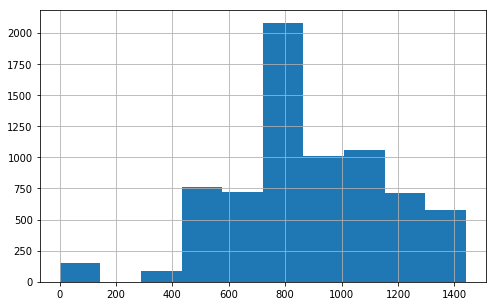

In [4]:
plt.figure(figsize=(8, 5))
df.lab_minutes.hist()
plt.show()

In [5]:
df_mens = pd.DataFrame(df.groupby(['lab_minutes']).count()['mensaje'])

In [6]:
df_mens.head(10)

,mensaje
lab_minutes,
1,5
2,3
3,8
4,4
5,1
7,1
8,2
9,3
10,4


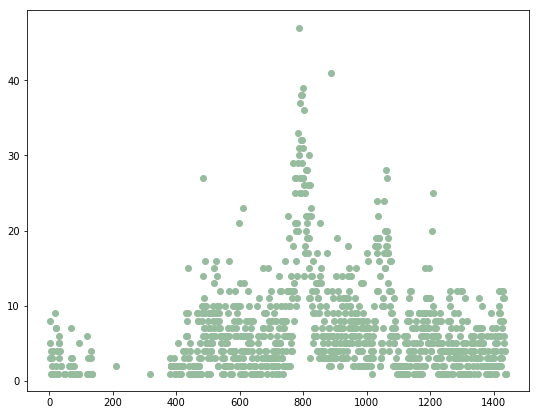

In [7]:
x = df_mens.index.get_level_values(level=0).tolist()

y = df_mens['mensaje'].tolist()

plt.figure(figsize=(9, 7))
plt.plot(x, y, 'o', color='#96bc9e')
plt.show()

In [8]:
##Cluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture

In [9]:
X = pd.DataFrame({'minutos':x, 'num_mensajes':y})

In [10]:
X_result = X.copy()

In [12]:
X_result.head()

,minutos,num_mensajes
0,1,5
1,2,3
2,3,8
3,4,4
4,5,1


In [13]:
lst_in = []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    lst_in.append(km.inertia_)

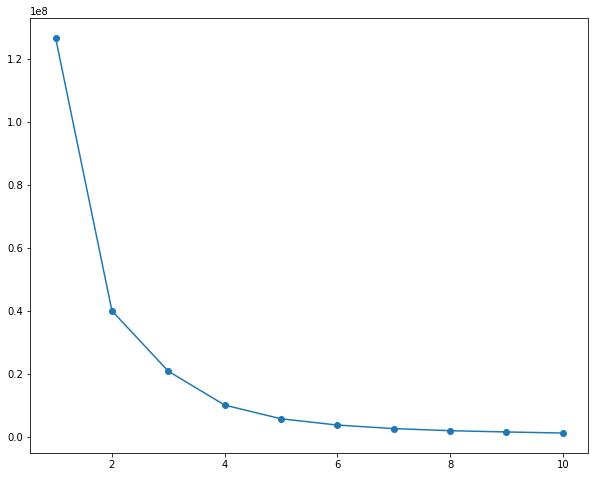

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(range(1,11),lst_in,marker='o')
plt.show()

In [15]:
n=5
agg = AgglomerativeClustering(n_clusters=n)
km = KMeans(n_clusters=n, random_state=123)
gmm = GaussianMixture(n_components=n, random_state=123)

In [16]:
km.fit(X)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=123, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [17]:
X_result['cl_agg'] = agg.fit_predict(X)
X_result['cl_km'] = km.predict(X)
X_result['cl_gmm'] = gmm.predict(X)

In [18]:
X_result.head()

,minutos,num_mensajes,cl_agg,cl_km,cl_gmm
0,1,5,2,4,3
1,2,3,2,4,3
2,3,8,2,4,3
3,4,4,2,4,3
4,5,1,2,4,3


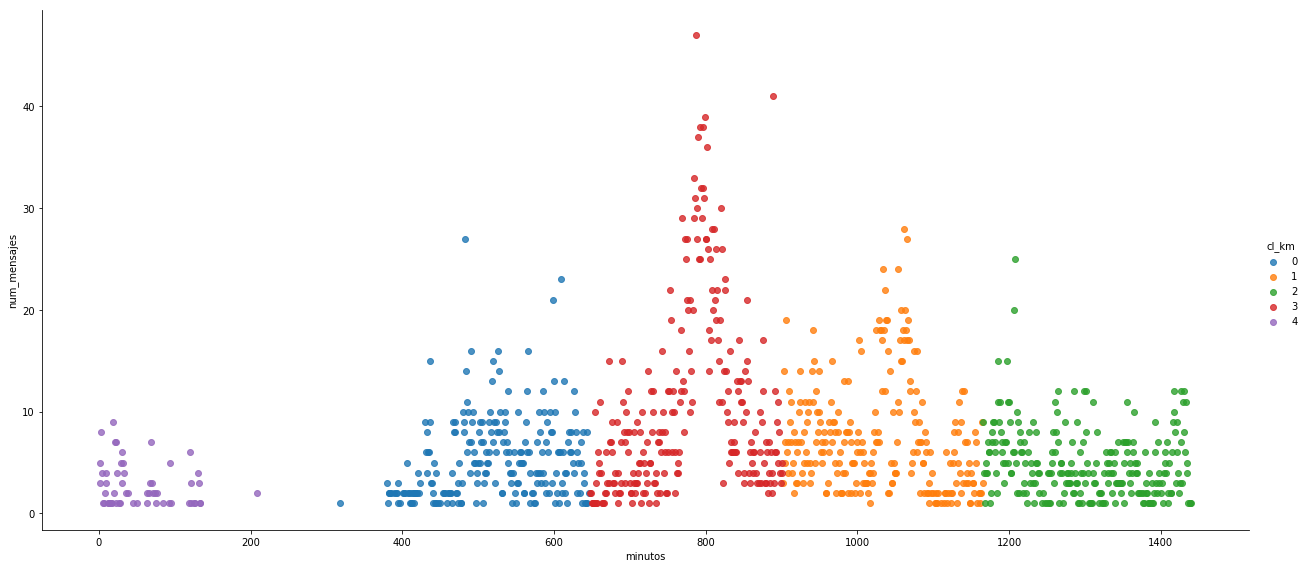

In [19]:
sns.lmplot(x = 'minutos', y = 'num_mensajes', data=X_result, height=8, aspect=2.2, fit_reg=False, hue='cl_km')
plt.show()

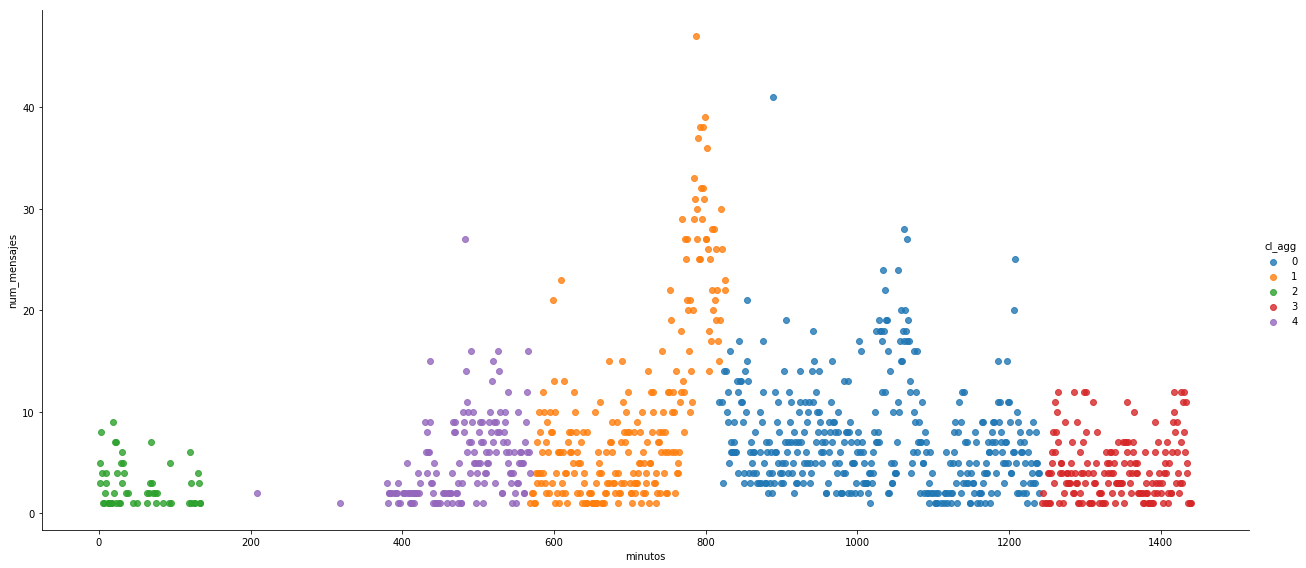

In [21]:
sns.lmplot(x = 'minutos', y = 'num_mensajes', data=X_result, height=8, aspect=2.2, fit_reg=False, hue='cl_agg')
plt.show()

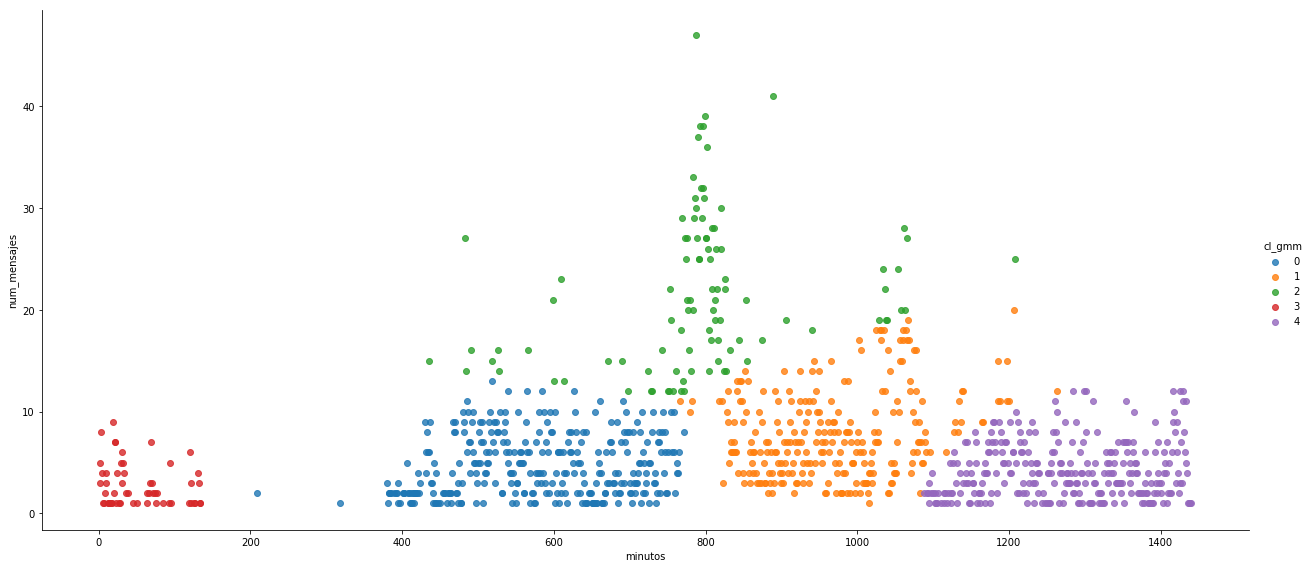

In [22]:
sns.lmplot(x = 'minutos', y = 'num_mensajes', data=X_result, height=8, aspect=2.2, fit_reg=False, hue='cl_gmm')
plt.show()